# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression Project (Raisin_Class_Prediction)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

**Data Set Information:**

https://www.researchgate.net/publication/347934123_Classification_of_Raisin_Grains_Using_Machine_Vision_and_Artificial_Intelligence_Methods

In [475]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [476]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df1 = df.copy()

In [477]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


# <font color='green'> <b>Exploratory Data Analysis (EDA) and Visualization</b><font color='black'>

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [480]:
df.shape

(900, 8)

In [481]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [482]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [483]:
df.duplicated().sum()

0

In [484]:
def outliers(df):

    for col in df.select_dtypes(include='number').columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]

        

        print(f"{col} - Outliers:")

        print(f"Number of Outliers: {outliers.shape[0]}")

        print(outliers[[col]])  

        print("---------------------------")

In [485]:
outliers(df)

Area - Outliers:
Number of Outliers: 41
       Area
85   180898
467  184784
469  195383
475  177264
479  189637
487  210923
506  182160
507  208264
515  188651
516  202118
522  177206
541  193032
552  204864
560  178334
574  193558
580  206720
581  205497
590  177916
616  199015
622  193818
650  194864
657  192815
666  178692
668  206689
671  182823
678  182788
708  222915
711  204226
751  182122
768  175247
769  195281
771  175946
777  181926
804  223075
812  235047
836  181126
855  189069
866  225043
870  179668
880  218459
893  187391
---------------------------
MajorAxisLength - Outliers:
Number of Outliers: 17
     MajorAxisLength
85        843.956653
290       722.853917
467       740.108710
469       755.012914
487       984.045491
506       997.291941
509       719.505878
540       730.760960
574       769.425149
634       731.561876
657       731.440292
668       746.145341
694       820.724022
708       731.559406
812       772.956877
836       949.662672
866       740.003743

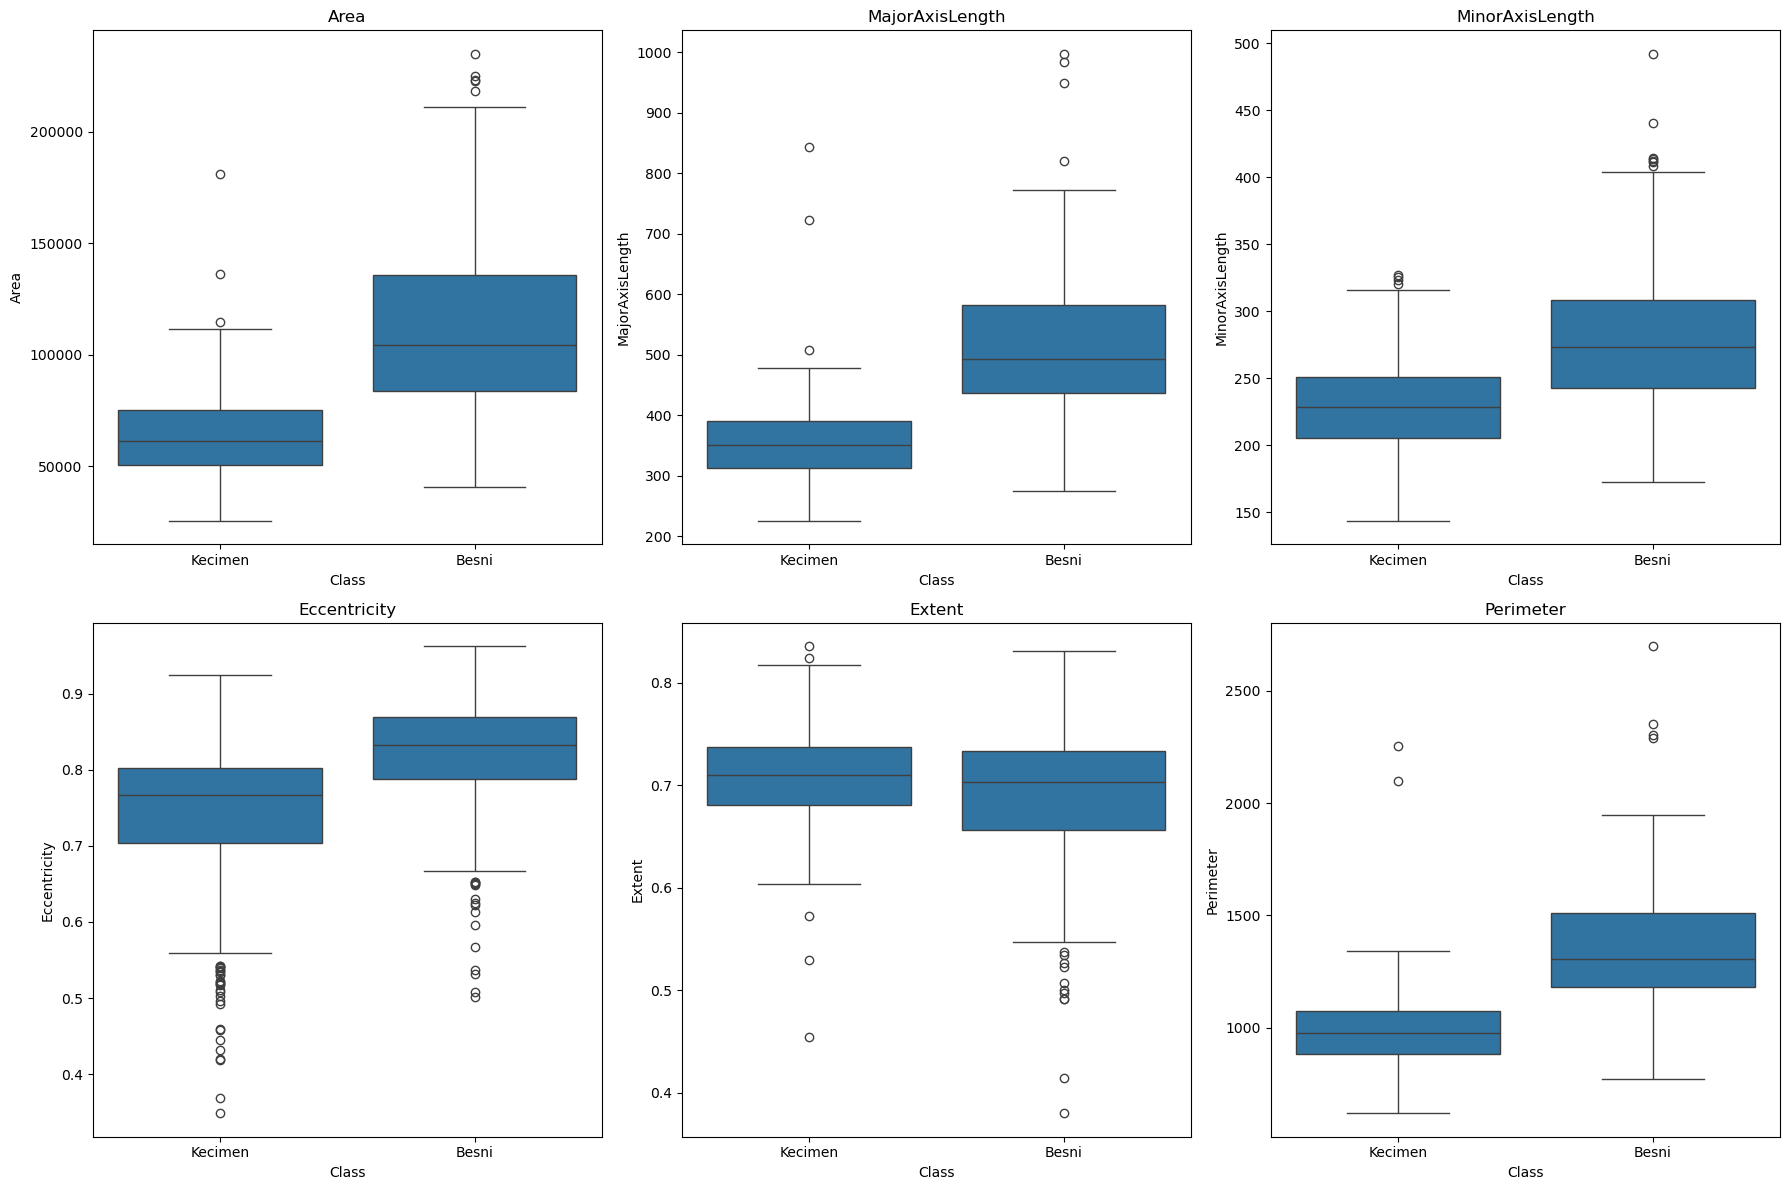

In [486]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 12)
ax = ax.flatten()

# Remove 'Class' and 'ConvexArea' columns from the list
clmn = df.columns.tolist()
clmn.remove("Class")
clmn.remove("ConvexArea")

# Create a boxplot for each column
for ax, clmn in zip(ax, clmn):
    sns.boxplot(data=df, x="Class", y=clmn, ax=ax)
    ax.set_title(clmn)  # Add a title to each subplot

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [487]:
# Handling outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to all numerical columns
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df = handle_outliers(df, col)

In [488]:
outliers(df)

Area - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [Area]
Index: []
---------------------------
MajorAxisLength - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [MajorAxisLength]
Index: []
---------------------------
MinorAxisLength - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [MinorAxisLength]
Index: []
---------------------------
Eccentricity - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [Eccentricity]
Index: []
---------------------------
ConvexArea - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [ConvexArea]
Index: []
---------------------------
Extent - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [Extent]
Index: []
---------------------------
Perimeter - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [Perimeter]
Index: []
---------------------------


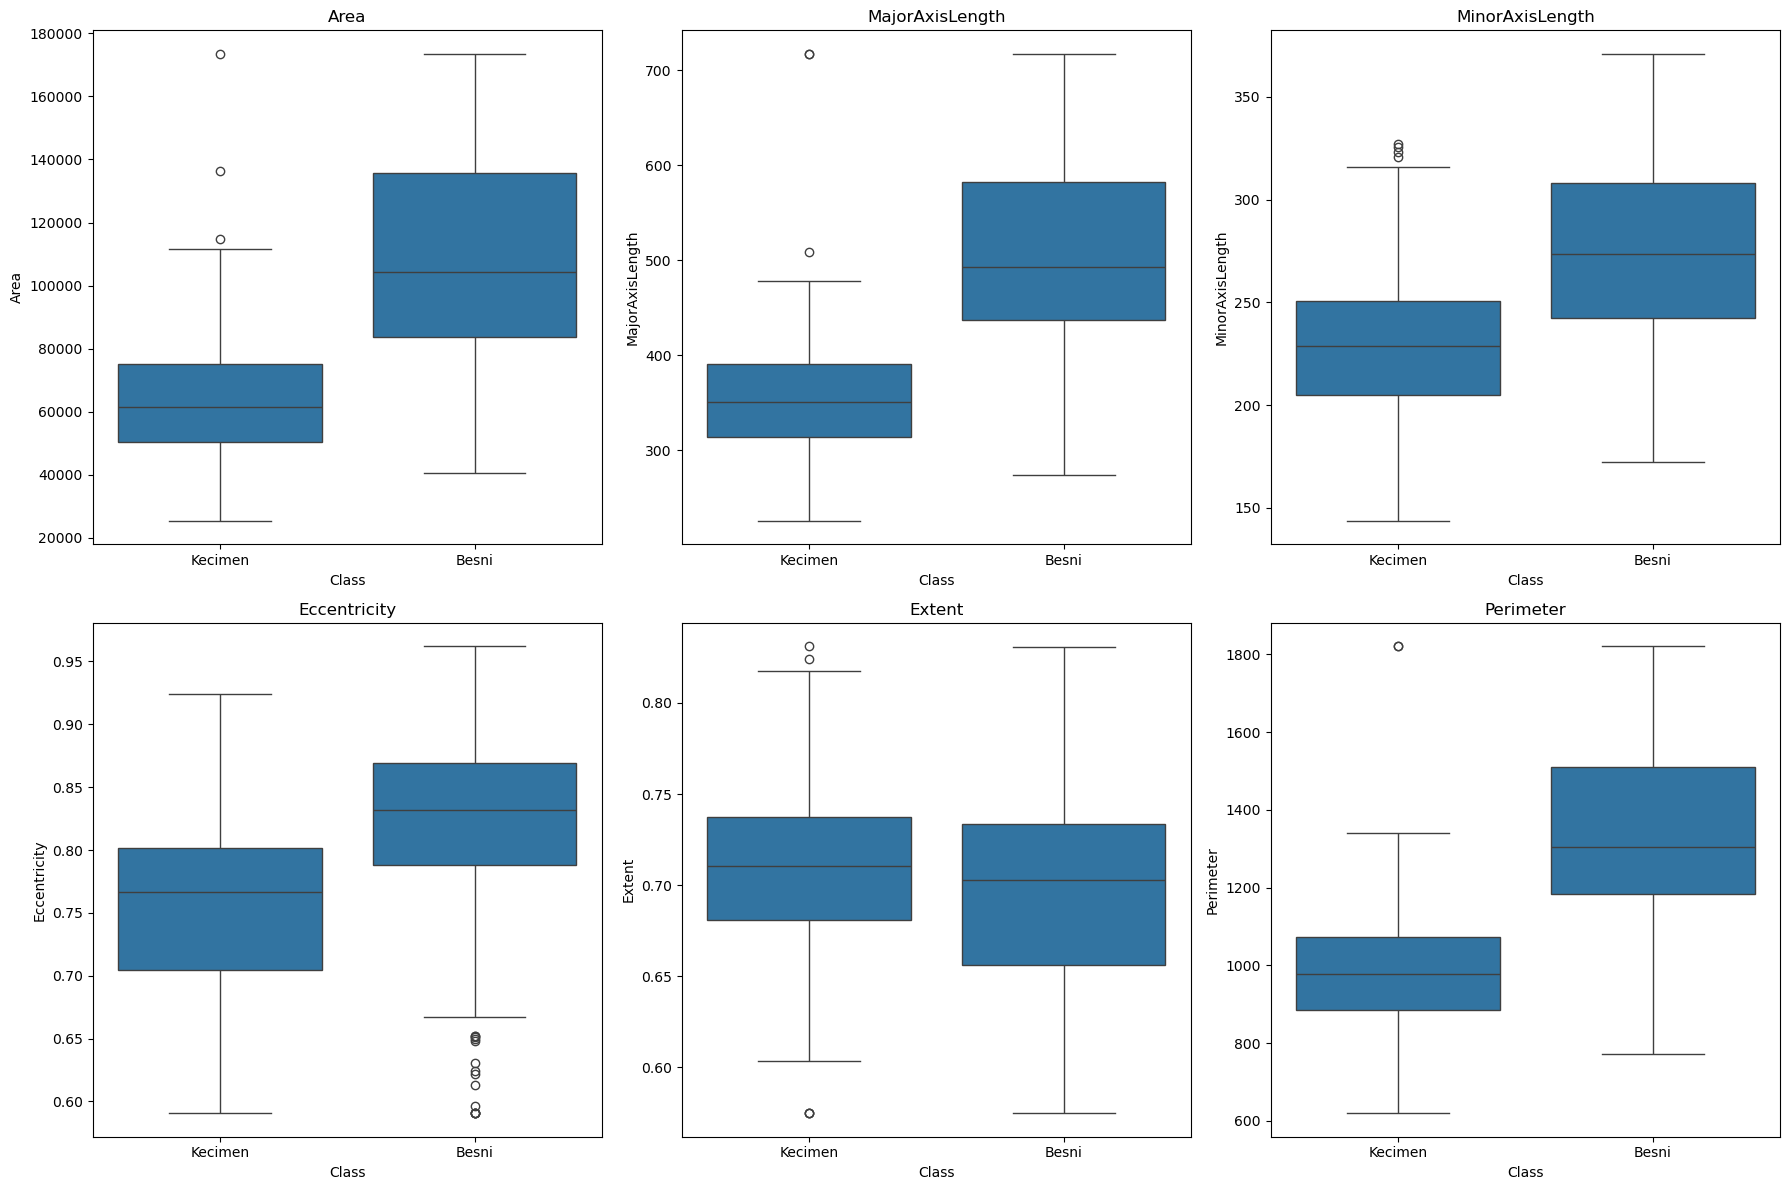

In [489]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 12)
ax = ax.flatten()

# Remove 'Class' and 'ConvexArea' columns from the list
clmn = df.columns.tolist()
clmn.remove("Class")
clmn.remove("ConvexArea")

# Create a boxplot for each column
for ax, clmn in zip(ax, clmn):
    sns.boxplot(data=df, x="Class", y=clmn, ax=ax)
    ax.set_title(clmn)  # Add a title to each subplot

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

In [490]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.590559,81463.0,0.792772,1073.251,Kecimen


In [491]:
df.shape

(900, 8)

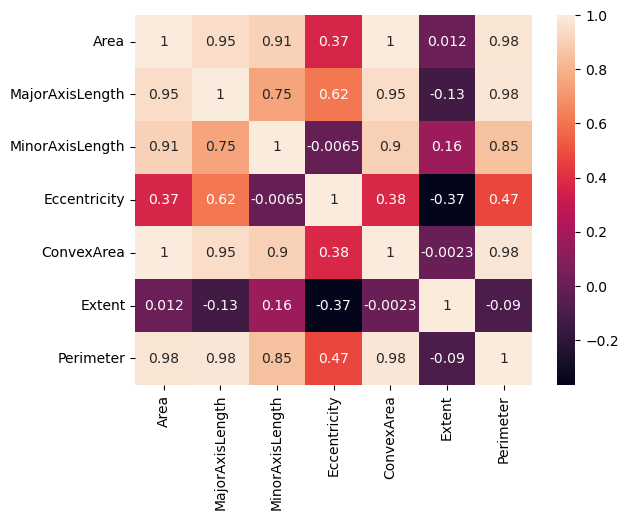

In [492]:
sns.heatmap(df.select_dtypes(include= "number").corr(), annot = True)
plt.show()

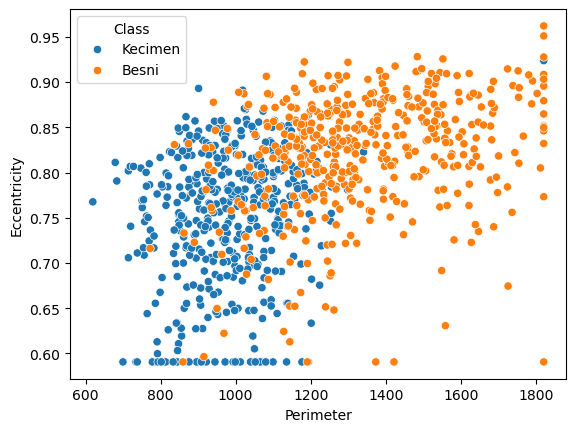

In [493]:
sns.scatterplot(x = df.Perimeter, y = df.Eccentricity, hue = df.Class )
plt.show()

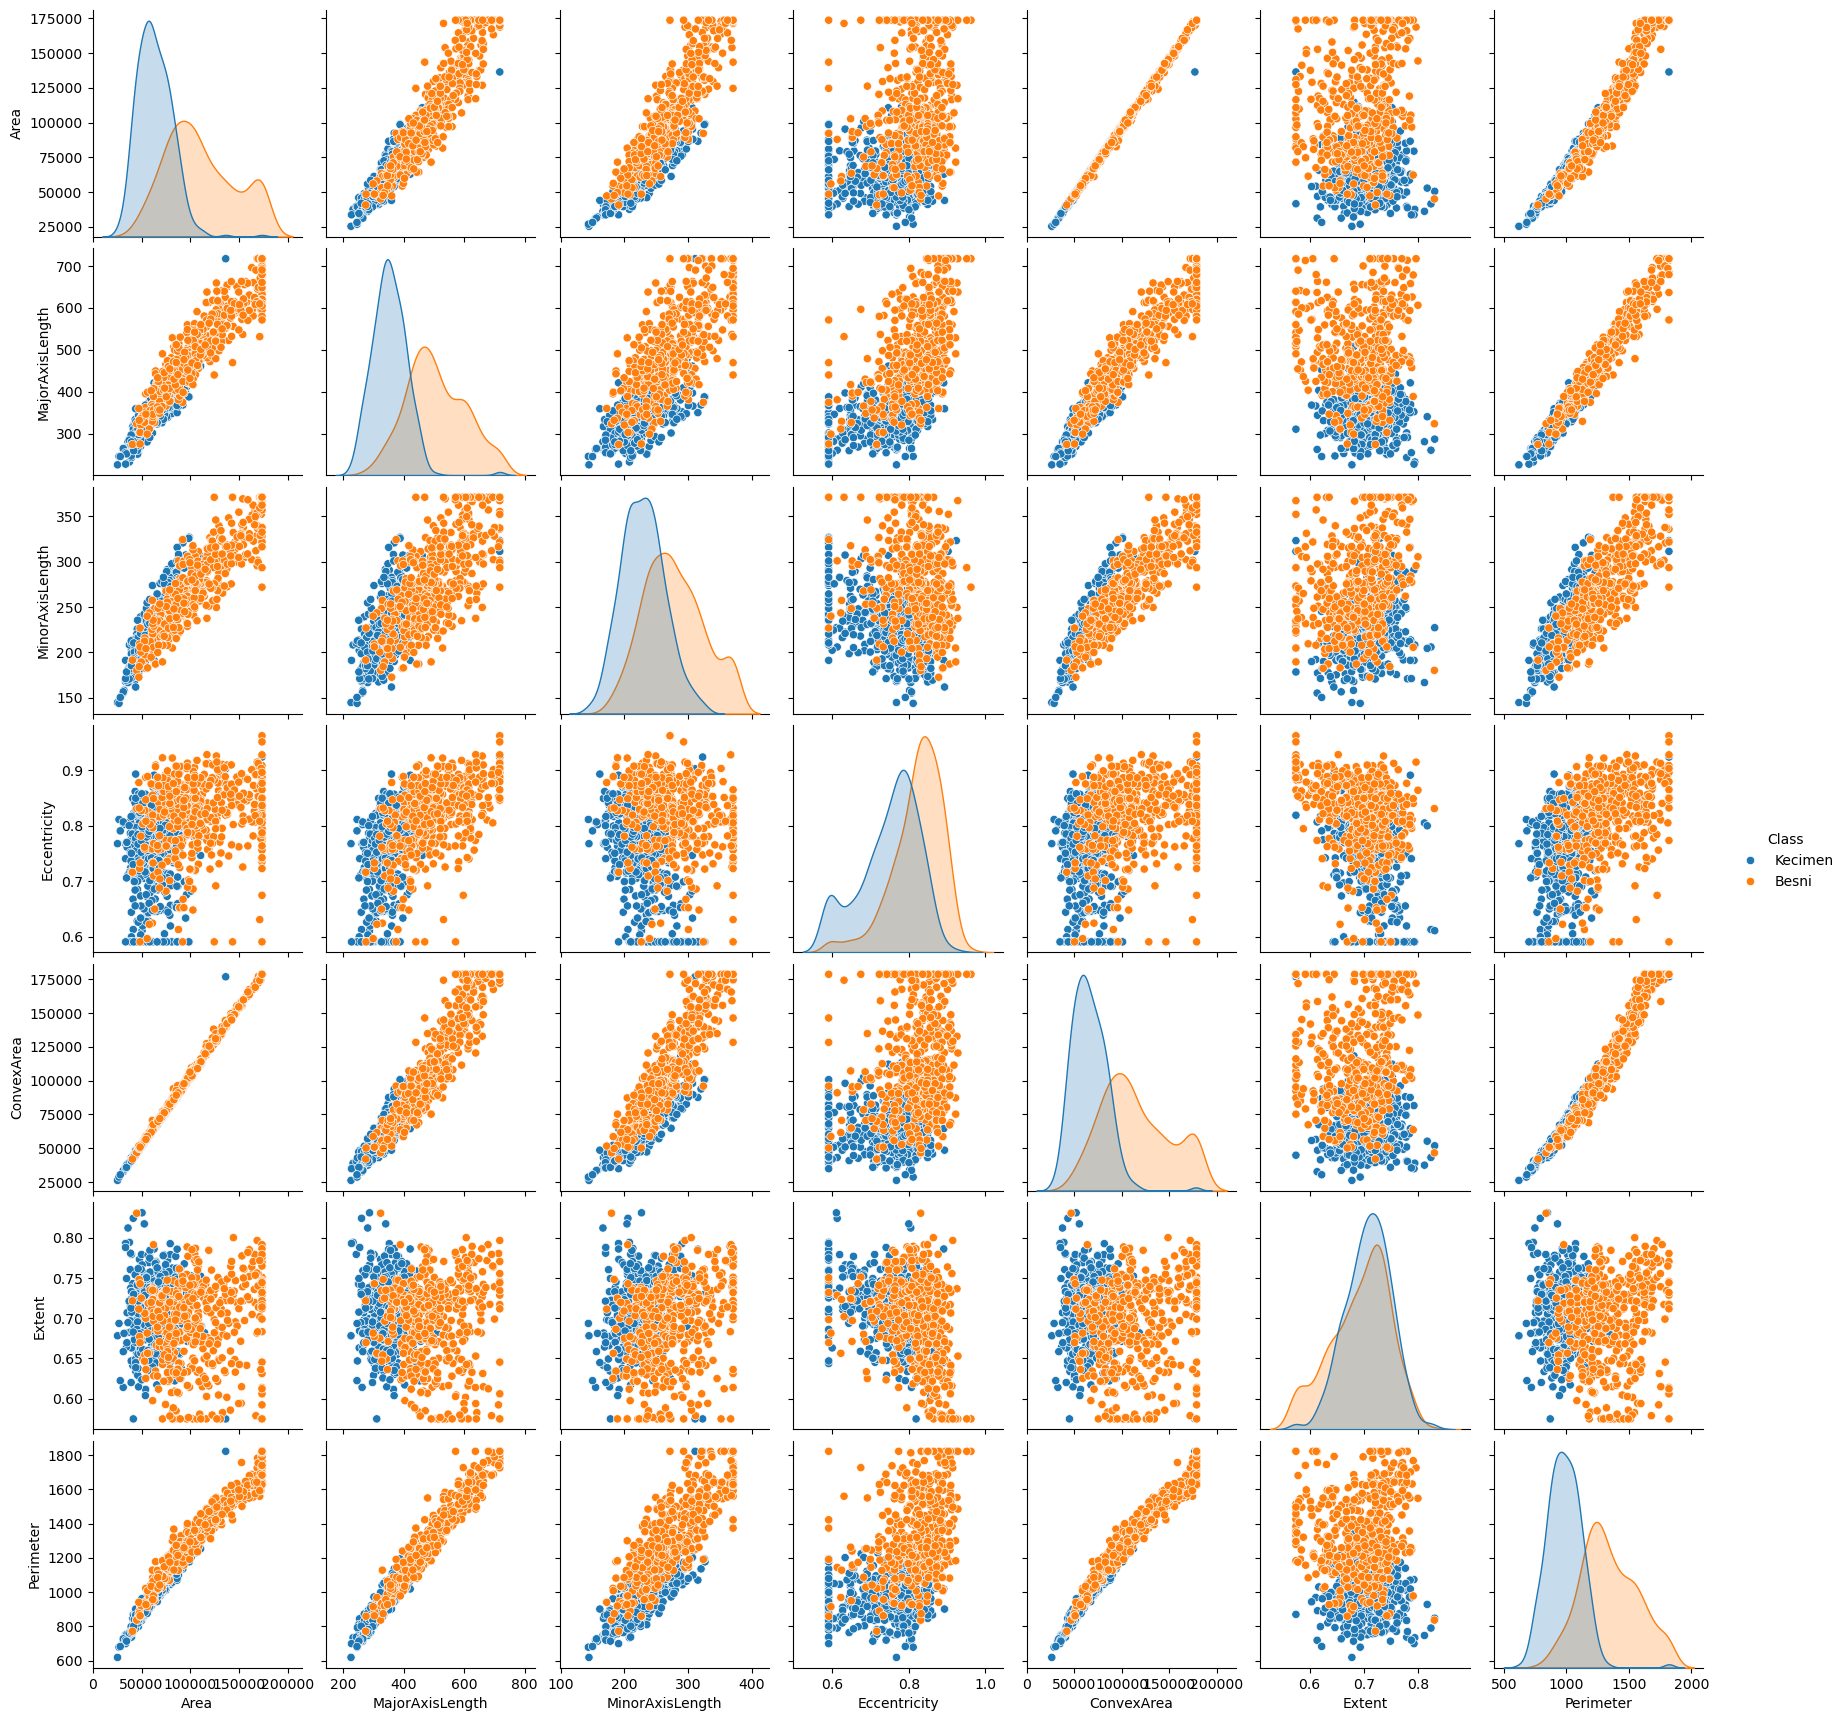

In [494]:
sns.pairplot(df, hue="Class")
plt.show()

In [495]:
df.Class.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

# <font color='green'> <b>Logistic Regression Model</b><font color='black'>

## <font color='blue'> <b>Train | Test Split and Scaling</b><font color='black'>

In [498]:
encoding_map = {'Kecimen': 0,'Besni':1}
df['Class'] = df['Class'].map(encoding_map).fillna(0).astype(int)
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
791,138202.0,556.981907,318.252801,0.820680,143228.0,0.697215,1576.336,1
8,42256.0,323.189607,172.575926,0.845499,44743.0,0.698031,849.728,0
357,61792.0,400.502828,197.703511,0.869667,64962.0,0.701162,1026.109,0
749,96753.0,477.499724,261.943408,0.836103,99964.0,0.694107,1258.683,1
386,65123.0,382.357686,218.888748,0.819925,66825.0,0.764337,1018.353,0


In [499]:
X = df.drop("Class", axis = 1)
y = df.Class

In [500]:
from sklearn.model_selection import train_test_split

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

## <font color='blue'> <b>Logistic Regression with Pipeline</b><font color='black'>

In [503]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [504]:
operations= [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

In [505]:
pipe_model = Pipeline(steps= operations)

In [506]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

## <font color='blue'> <b>X_test + y_yest + y_pred + y_pred_proba</b><font color='black'>

In [508]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1])

In [509]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.08056448, 0.91943552],
       [0.68320482, 0.31679518],
       [0.10006721, 0.89993279],
       [0.81098749, 0.18901251],
       [0.63220391, 0.36779609],
       [0.17074777, 0.82925223],
       [0.07408642, 0.92591358],
       [0.017846  , 0.982154  ],
       [0.5205594 , 0.4794406 ],
       [0.98383852, 0.01616148],
       [0.05494095, 0.94505905],
       [0.06869514, 0.93130486],
       [0.425461  , 0.574539  ],
       [0.4663731 , 0.5336269 ],
       [0.00759476, 0.99240524],
       [0.01409356, 0.98590644],
       [0.69539489, 0.30460511],
       [0.97562987, 0.02437013],
       [0.00806404, 0.99193596],
       [0.8641052 , 0.1358948 ],
       [0.44148329, 0.55851671],
       [0.15166598, 0.84833402],
       [0.00047155, 0.99952845],
       [0.02527104, 0.97472896],
       [0.28775571, 0.71224429],
       [0.61885155, 0.38114845],
       [0.8582565 , 0.1417435 ],
       [0.02974546, 0.97025454],
       [0.01362346, 0.98637654],
       [0.38086514, 0.61913486],
       [0.

In [510]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["y_pred"] = y_pred
test_data["y_pred_proba"] = y_pred_proba[:, 1].round(2)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,y_pred,y_pred_proba
814,83932.000,499.237754,224.472389,0.893215,88572.0,0.670844,1258.062,1,1,0.92
195,87302.000,392.910117,284.179068,0.690568,89605.0,0.738246,1122.160,0,0,0.32
887,94282.000,494.162960,244.803889,0.868670,97707.0,0.702386,1269.680,1,1,0.90
355,69781.000,364.744519,248.796190,0.731249,71504.0,0.693938,1024.207,0,0,0.19
697,93441.000,396.790780,300.812608,0.652122,95370.0,0.723317,1157.771,1,0,0.37
...,...,...,...,...,...,...,...,...,...,...
634,169645.000,717.303188,299.413405,0.912409,174278.0,0.755516,1753.016,1,1,1.00
578,129038.000,540.814829,306.817764,0.823494,134796.0,0.648758,1459.345,1,1,0.98
89,49059.000,301.800398,210.467215,0.716709,50835.0,0.698607,867.582,0,0,0.05
581,173548.625,632.727607,371.054747,0.755969,178669.5,0.769289,1736.839,1,1,1.00


## <font color='blue'> <b>Model Performance</b><font color='black'>

In [512]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [513]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[80 12]
 [12 76]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        92
           1       0.86      0.86      0.86        88

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[318  40]
 [ 58 304]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       358
           1       0.88      0.84      0.86       362

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



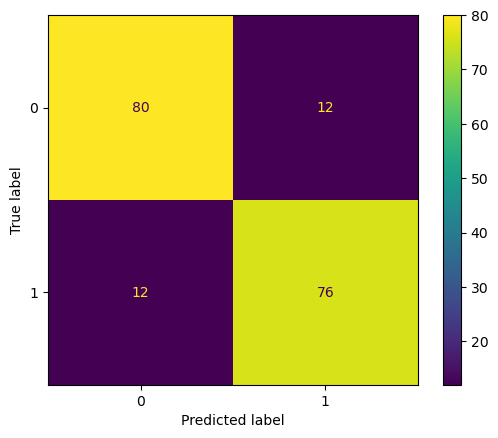

In [514]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

## <font color='blue'> <b>Cross Validate</b><font color='black'>

In [516]:
from sklearn.model_selection import cross_validate

In [517]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:,2:].mean()

test_accuracy      0.868056
train_accuracy     0.865278
test_precision     0.884881
train_precision    0.883078
test_recall        0.847898
train_recall       0.843767
test_f1            0.864683
train_f1           0.862964
dtype: float64

## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [519]:
from sklearn.model_selection import GridSearchCV
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]
model = Pipeline(steps=operations)

In [520]:
from sklearn.model_selection import GridSearchCV
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]
model = Pipeline(steps=operations)

# Hiperparametre ızgarası
param_grid = {
    'logistic__C': [0.1, 1, 10],  # Regularization parametresi
    'logistic__penalty': ['l1', 'l2'],  # Ceza türü
    'logistic__solver': ['liblinear']  # L1 için uygun solver
}

# GridSearchCV
grid_model = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

# Modeli eğitme
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'logistic__C': [0.1, 1, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear']},
             return_train_score=True)

In [521]:
grid_model.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}

In [522]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[82 10]
 [14 74]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        92
           1       0.88      0.84      0.86        88

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  41]
 [ 53 309]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       358
           1       0.88      0.85      0.87       362

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



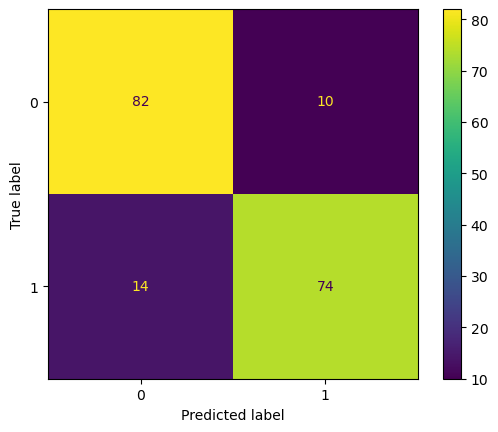

In [523]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

## <font color='blue'> <b>Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)</b><font color='black'>

In [525]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score

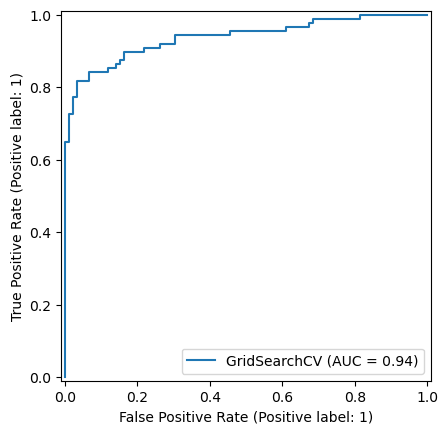

In [526]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

In [527]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.9382411067193676

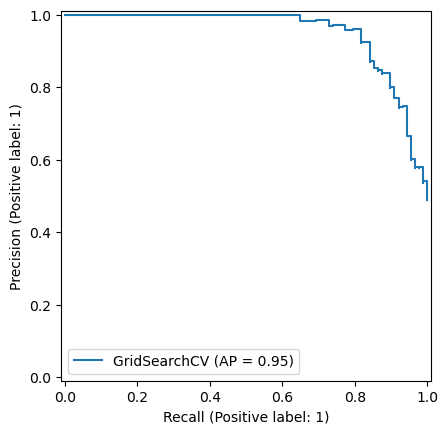

In [528]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

In [529]:
average_precision_score(y_test,y_pred_proba[:,1])

0.9515391977249884

# <font color='green'> <b>Prediction</b><font color='black'>

In [531]:
operations = [("scaler",StandardScaler()), ("logistic",LogisticRegression(penalty='l1',C=1, solver='liblinear',))]

final_model = Pipeline(steps= operations)

final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [532]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,0
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,0
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,0
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,0
4,79408.0,352.190770,290.827533,0.590559,81463.0,0.792772,1073.251,0


In [533]:
my_dict = {"Area": [87500, 75500, 65500],
           "MajorAxisLength": [450.2, 400,350],
          "MinorAxisLength": [250.2, 300, 290],
          "Eccentricity": [0.62,0.7,0.67],
          "ConvexArea": [80450, 76400,55350],
          "Extent": [0.76,0.59,0.80],
          "Perimeter": [1078, 1185,850]}

In [534]:
sample = pd.DataFrame(my_dict)

In [535]:
predictions = final_model.predict(sample) # final modele predict için scale edilen sample verilir
predictions_proba =  final_model.predict_proba(sample)

In [536]:
predictions

array([0, 0, 0])

In [537]:
predictions_proba

array([[0.54285985, 0.45714015],
       [0.59787333, 0.40212667],
       [0.99842652, 0.00157348]])

# <font color='green'> <b>Conclusion</b><font color='black'>

In [539]:
operations = [("scaler",StandardScaler()), ("logistic",LogisticRegression())]

lr_final_model = Pipeline(steps= operations)

lr_final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [540]:
import pickle
pickle.dump(lr_final_model, open("lr_final_model","wb"))

In [541]:
lr_final_model = pickle.load(open("lr_final_model", "rb"))

In [542]:
predictions = lr_final_model.predict(sample) 
predictions_proba = lr_final_model.predict_proba(sample) 

In [543]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred,pred_proba
0,87500,450.2,250.2,0.62,80450,0.76,1078,0,0.422393
1,75500,400.0,300.0,0.70,76400,0.59,1185,0,0.401270
2,65500,350.0,290.0,0.67,55350,0.80,850,0,0.005296


# <font color='green'> <b>KNN</b><font color='black'>

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [549]:
from sklearn.neighbors import KNeighborsClassifier
operations = [("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=5))]

In [550]:
pipe_model = Pipeline(steps=operations)

In [551]:
param_grid = [
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

In [552]:
knn_grid_model = GridSearchCV(pipe_model, param_grid, cv=5, scoring= "accuracy", return_train_score=True)

In [553]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(1, 30),
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [554]:
knn_grid_model.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 26, 'knn__weights': 'uniform'}

In [555]:
test_error_rates = []
for k in range(1,80):
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    accuracy_mean = scores["test_accuracy"].mean()
    test_error = 1 - accuracy_mean
    test_error_rates.append(test_error)

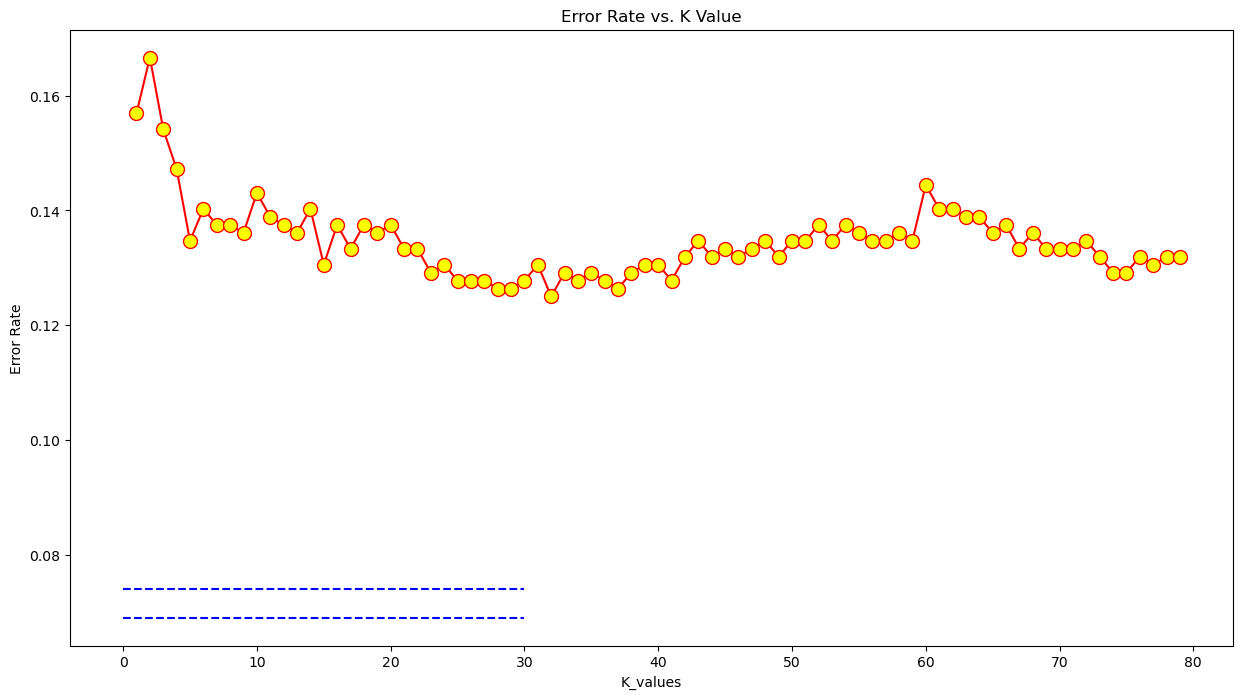

In [556]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 80),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='b', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='b', linestyles="--")
plt.show()

In [557]:
operations = [("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=7,metric='euclidean'))]
knn_pipe_model = Pipeline(steps=operations)

In [558]:
knn_pipe_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7))])

In [559]:
eval_metric(knn_pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[80 12]
 [17 71]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        92
           1       0.86      0.81      0.83        88

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180


Train_Set
[[329  29]
 [ 53 309]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       358
           1       0.91      0.85      0.88       362

    accuracy                           0.89       720
   macro avg       0.89      0.89      0.89       720
weighted avg       0.89      0.89      0.89       720



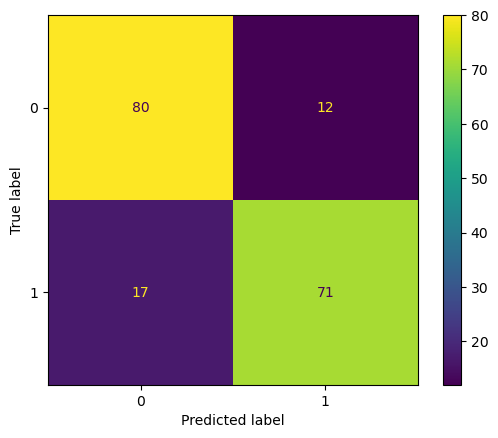

In [560]:
ConfusionMatrixDisplay.from_estimator(knn_pipe_model, X_test, y_test);

# <font color='green'> <b>SVM</b><font color='black'>

In [684]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, PrecisionRecallDisplay, average_precision_score

In [686]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [688]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.5],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

In [690]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)
svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

In [691]:
svm_model_grid.best_params_

{'SVC__C': 0.001,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 0.5,
 'SVC__kernel': 'rbf'}

In [692]:
operations = [("scaler", StandardScaler()),("SVC", SVC(C= 0.001,gamma = 0.5))]

In [693]:
svm_pipe_model = Pipeline(steps = operations)

In [694]:
svm_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(C=0.001, gamma=0.5))])

In [695]:
svm_pipe_model.predict(sample2)

array([0, 1, 1, 1, 1])

In [570]:
eval_metric(svm_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[288  72]
 [ 47 313]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       360
           1       0.81      0.87      0.84       360

    accuracy                           0.83       720
   macro avg       0.84      0.83      0.83       720
weighted avg       0.84      0.83      0.83       720



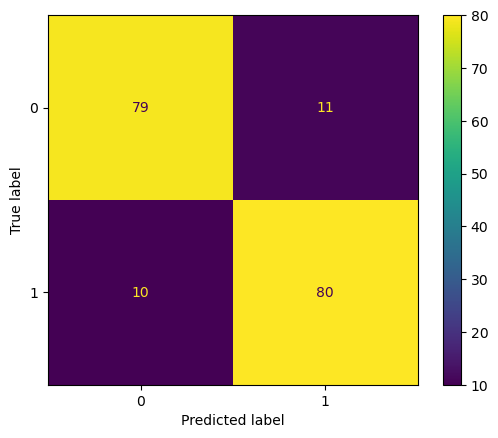

In [571]:
ConfusionMatrixDisplay.from_estimator(svm_pipe_model, X_test, y_test);

# <font color='green'> <b>Final Model</b><font color='black'>

In [573]:
my_dict = {"Area": [87500, 75500, 65500],
           "MajorAxisLength": [450.2, 400,350],
          "MinorAxisLength": [250.2, 300, 290],
          "Eccentricity": [0.62,0.7,0.67],
          "ConvexArea": [80450, 76400,55350],
          "Extent": [0.76,0.59,0.80],
          "Perimeter": [1078, 1185,850]}

In [574]:
sample = pd.DataFrame(my_dict)

In [575]:
operations = [("scaler", StandardScaler()),("SVC", SVC(C= 0.001,gamma = 0.5))]

In [576]:
final_svm_pipe_model = Pipeline(steps = operations)

In [577]:
final_svm_pipe_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(C=0.001, gamma=0.5))])

In [578]:
import pickle
pickle.dump(final_svm_pipe_model, open("final_svm_pipe_model","wb"))

In [579]:
final_svm_pipe_model = pickle.load(open("final_svm_pipe_model", "rb"))

In [580]:
predictions = final_svm_pipe_model.predict(sample) 
predictions

array([0, 1, 1])